<a href="https://colab.research.google.com/github/Priangshu-18/Face-Mask-Detection-System-using-CNN/blob/main/Face_Mask_Detection_System_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the face mask dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 61% 99.0M/163M [00:00<00:00, 1.04GB/s]
100% 163M/163M [00:00<00:00, 1.01GB/s] 


In [4]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3514.jpg', 'with_mask_2408.jpg', 'with_mask_3074.jpg', 'with_mask_102.jpg', 'with_mask_305.jpg']
['with_mask_909.jpg', 'with_mask_101.jpg', 'with_mask_817.jpg', 'with_mask_1914.jpg', 'with_mask_1505.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2279.jpg', 'without_mask_469.jpg', 'without_mask_2503.jpg', 'without_mask_1301.jpg', 'without_mask_3333.jpg']
['without_mask_206.jpg', 'without_mask_503.jpg', 'without_mask_2210.jpg', 'without_mask_1379.jpg', 'without_mask_1562.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Label for the two class

with mask --> 1

without mask --> 2

In [10]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

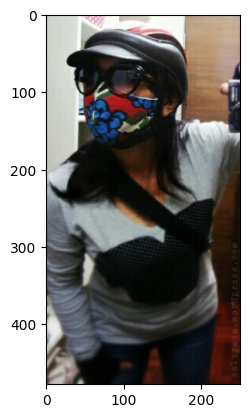

In [12]:
# Displaying with mask images
img = mping.imread('/content/data/with_mask/with_mask_3241.jpg')
imgplot = plt.imshow(img)
plt.show()

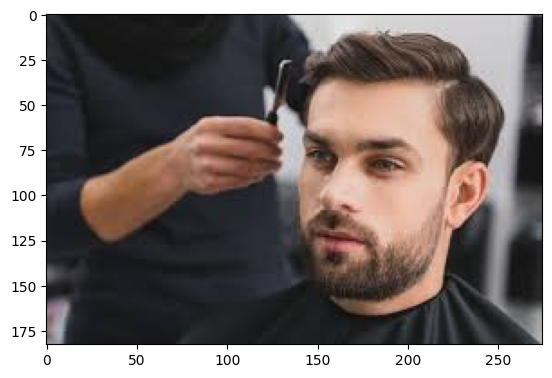

In [13]:
# Displaying without mask images
img = mping.imread('/content/data/without_mask/without_mask_3409.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the image

2. Convert the images into numpy array

In [14]:
data = []

with_mask_path = '/content/data/with_mask/'

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
len(data)

7553

In [16]:
type(data)

list

array([[[ 48,  45,  55],
        [ 52,  49,  60],
        [ 59,  59,  70],
        ...,
        [ 86,  85, 130],
        [ 86,  84, 131],
        [ 85,  83, 130]],

       [[ 46,  43,  52],
        [ 51,  48,  57],
        [ 58,  57,  67],
        ...,
        [ 86,  85, 130],
        [ 86,  84, 131],
        [ 85,  83, 130]],

       [[ 45,  42,  50],
        [ 48,  45,  53],
        [ 56,  56,  64],
        ...,
        [ 86,  85, 129],
        [ 85,  83, 130],
        [ 84,  82, 129]],

       ...,

       [[ 11,  70,  74],
        [  5,  45,  48],
        [  1,  27,  32],
        ...,
        [146, 149, 202],
        [146, 149, 202],
        [146, 149, 202]],

       [[  5,  45,  45],
        [  1,  22,  25],
        [  7,  44,  46],
        ...,
        [146, 149, 202],
        [146, 149, 202],
        [146, 149, 202]],

       [[  1,  17,  22],
        [  5,  35,  36],
        [ 13,  75,  75],
        ...,
        [146, 149, 202],
        [146, 149, 202],
        [146, 149, 202]]], dtype=uint8)
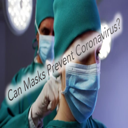

In [17]:
data[0]

In [18]:
data[0].shape

(128, 128, 3)

In [19]:
# Converting the image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [20]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [23]:
# Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
print(X_train_scaled)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.3372549  0.3372549  0.34509804]
   [0.         0.         0.00392157]
   [0.01960784 0.01176471 0.0627451 ]
   ...
   [0.01176471 0.00784314 0.02745098]
   [0.74117647 0.74117647 0.74117647]
   [1.         1.         1.        ]]

  [[0.3372549  0.3372549  0.34509804]
   [0. 

Building a Neural Network (CNN)

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
# Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - acc: 0.6866 - loss: 0.7084 - val_acc: 0.8992 - val_loss: 0.2560
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8852 - loss: 0.3075 - val_acc: 0.8529 - val_loss: 0.3062
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8945 - loss: 0.2460 - val_acc: 0.9140 - val_loss: 0.2192
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9156 - loss: 0.2178 - val_acc: 0.9388 - val_loss: 0.1626
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9315 - loss: 0.1908 - val_acc: 0.9372 - val_loss: 0.1835


Model Evaluation

In [29]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9306 - loss: 0.1966
Test Accuracy = 0.9285241365432739


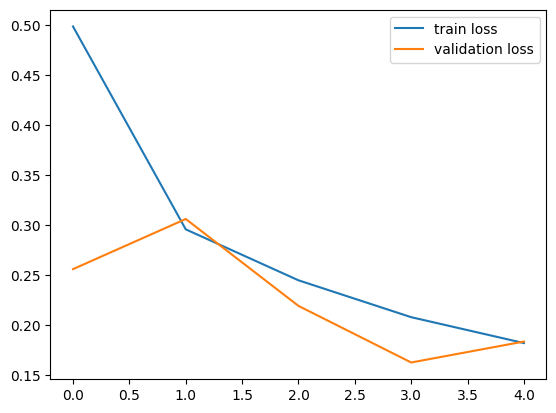

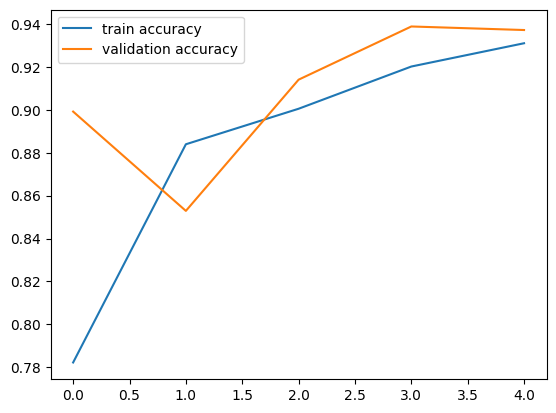

In [30]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/man-wearing-face-mask-19004588.webp


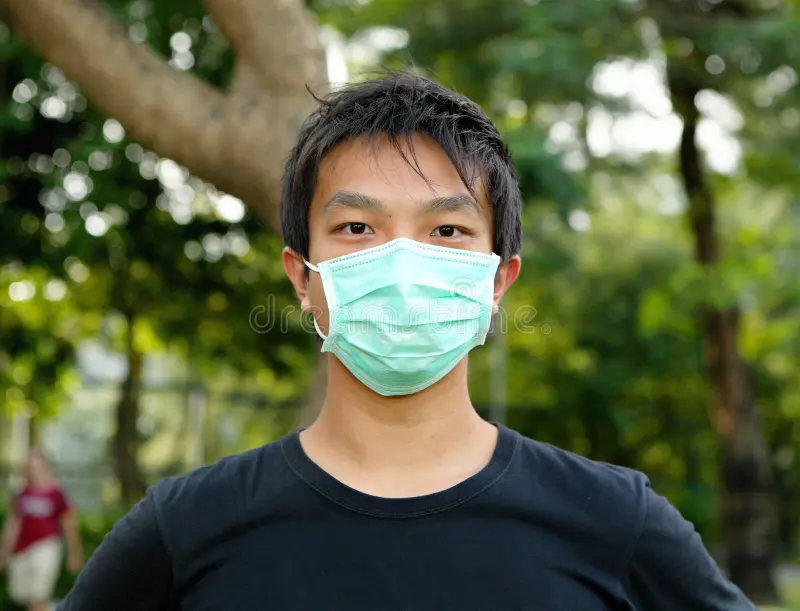

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.44942498 0.55117166]]
1
The person in the image is wearing a mask


In [32]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/serious-looking-young-man-portrait-29762325.webp


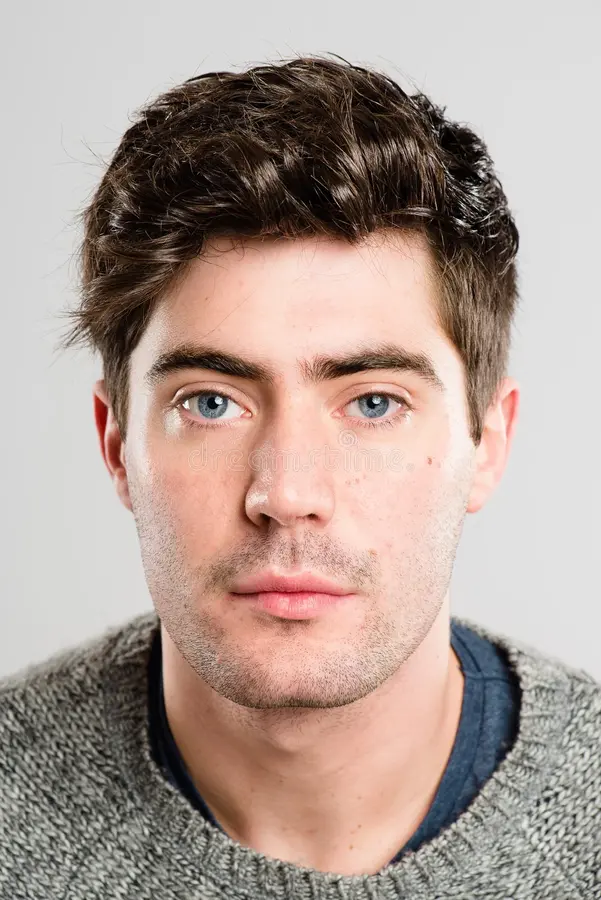

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.49261355 0.4920523 ]]
0
The person in the image is not wearing a mask


In [34]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')